# Python Polymarket Quoter Exploration

This Jupyter Notebook contains explorations related to my relavent polymarket quoting.

## Table of Contents

1. [Introduction](#Introduction)
2. [Hello World Example](#Hello-World-Example)
3. [Plotting Example](#Plotting-Example)
4. [Trading Data Example](#Trading-Data-Example)

## Introduction

This notebook demonstrates basic Python programming concepts and techniques. Below is a simple "Hello World" example.

## Hello World Example

The following cell prints "hello world" to the console.

In [1]:
print("hello world")

hello world


## Plotting Example

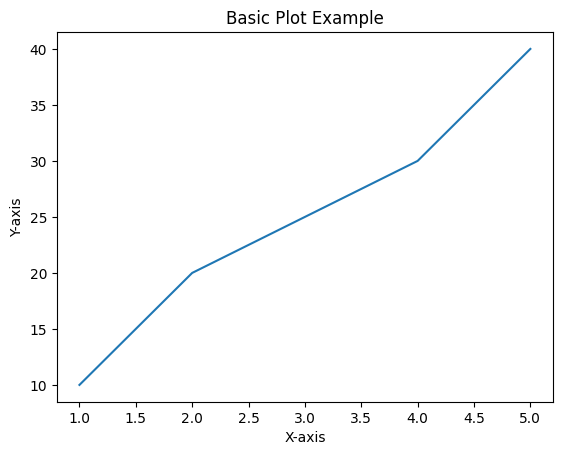

In [2]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 40] 
# Create a basic plot
plt.plot(x, y)

# Add title and labels
plt.title('Basic Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Display the plot
plt.show()

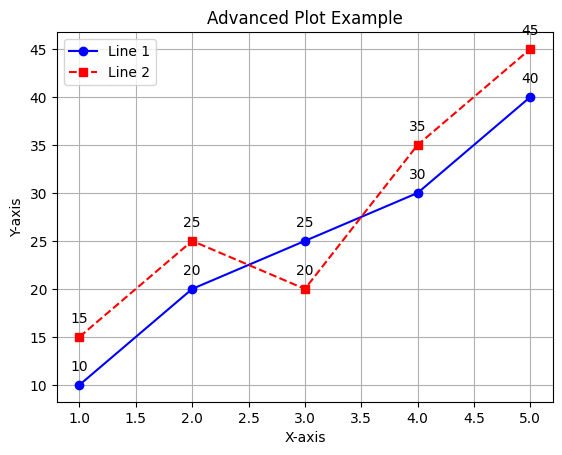

In [3]:
# Sample data for multiple lines
x = [1, 2, 3, 4, 5]
y1 = [10, 20, 25, 30, 40]
y2 = [15, 25, 20, 35, 45]

# Create multiple line plots
plt.plot(x, y1, label='Line 1', marker='o', linestyle='-', color='b')
plt.plot(x, y2, label='Line 2', marker='s', linestyle='--', color='r')

# Add title and labels
plt.title('Advanced Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Add annotations
for i, txt in enumerate(y1):
    plt.annotate(txt, (x[i], y1[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(y2):
    plt.annotate(txt, (x[i], y2[i]), textcoords="offset points", xytext=(0,10), ha='center')

## Trading Data Example

In [4]:
import yfinance as yf

# Fetch data for a specific stock
stock = yf.Ticker("AAPL")

# Get historical market data
hist = stock.history(period="1mo")

print(hist)

                                 Open        High         Low       Close  \
Date                                                                        
2024-10-02 00:00:00-04:00  225.889999  227.369995  223.020004  226.779999   
2024-10-03 00:00:00-04:00  225.139999  226.809998  223.320007  225.669998   
2024-10-04 00:00:00-04:00  227.899994  228.000000  224.130005  226.800003   
2024-10-07 00:00:00-04:00  224.500000  225.690002  221.330002  221.690002   
2024-10-08 00:00:00-04:00  224.300003  225.979996  223.250000  225.770004   
2024-10-09 00:00:00-04:00  225.229996  229.750000  224.830002  229.539993   
2024-10-10 00:00:00-04:00  227.779999  229.500000  227.169998  229.039993   
2024-10-11 00:00:00-04:00  229.300003  229.410004  227.339996  227.550003   
2024-10-14 00:00:00-04:00  228.699997  231.729996  228.600006  231.300003   
2024-10-15 00:00:00-04:00  233.610001  237.490005  232.369995  233.850006   
2024-10-16 00:00:00-04:00  231.600006  232.119995  229.839996  231.779999   

[                       0%                       ]

[*********************100%***********************]  3 of 3 completed


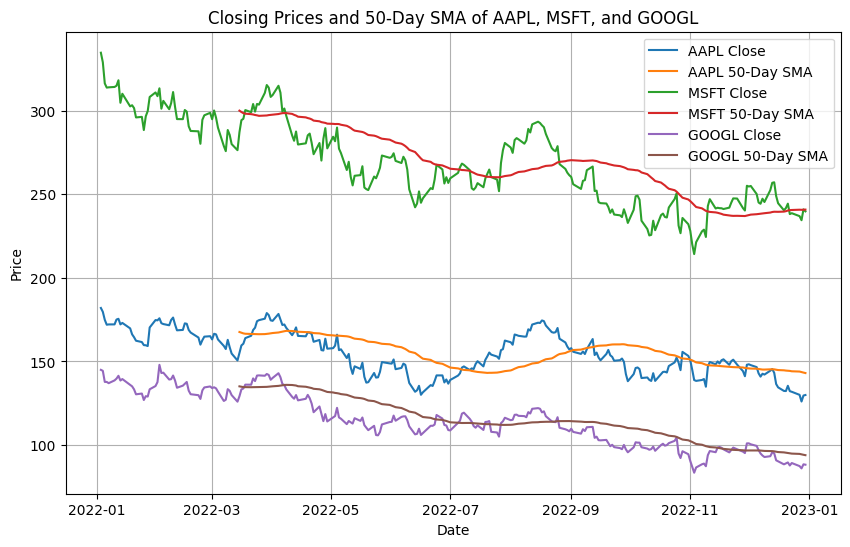

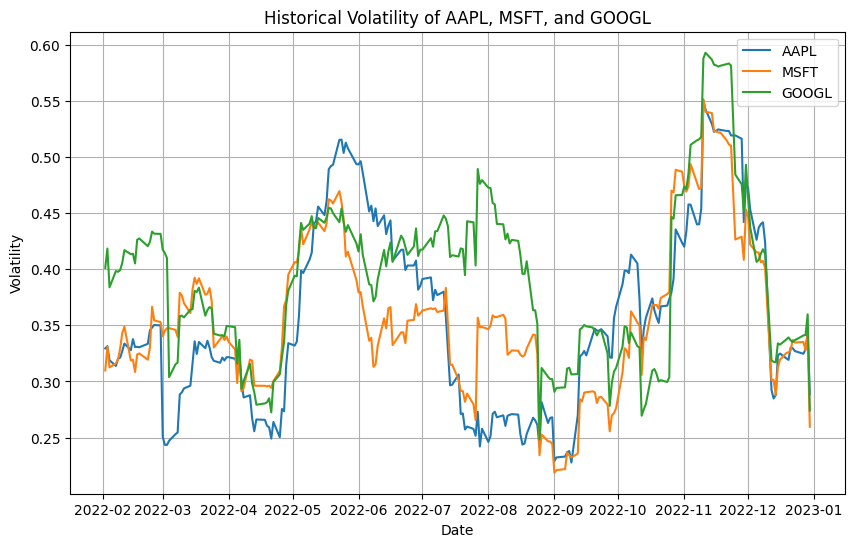

Correlation matrix of historical volatilities:
Ticker      AAPL     GOOGL      MSFT
Ticker                              
AAPL    1.000000  0.613351  0.765589
GOOGL   0.613351  1.000000  0.775210
MSFT    0.765589  0.775210  1.000000


In [10]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# List of tickers
tickers = ['AAPL', 'MSFT', 'GOOGL']

# Fetch data
data = yf.download(tickers, start='2022-01-01', end='2022-12-31')

# Get the closing prices using .loc and .copy() to avoid SettingWithCopyWarning
closing_prices = data.loc[:, ('Close', slice(None))].copy()

# Calculate the 50-day simple moving average (SMA)
sma_50 = closing_prices.rolling(window=50).mean()

# Assign the SMA values back to the DataFrame using .loc
for ticker in tickers:
    closing_prices.loc[:, ('SMA_50', ticker)] = sma_50[('Close', ticker)]

# Plot the closing prices and the 50-day SMA
plt.figure(figsize=(10, 6))

for ticker in tickers:
    plt.plot(closing_prices.index, closing_prices[('Close', ticker)], label=f'{ticker} Close')
    plt.plot(closing_prices.index, closing_prices[('SMA_50', ticker)], label=f'{ticker} 50-Day SMA')

plt.title('Closing Prices and 50-Day SMA of AAPL, MSFT, and GOOGL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate daily returns
daily_returns = closing_prices['Close'].pct_change()

# Calculate daily returns
daily_returns = closing_prices['Close'].pct_change()

# Calculate historical volatility (rolling standard deviation of daily returns)
volatility = daily_returns.rolling(window=21).std() * np.sqrt(252)

# Plot the historical volatility
plt.figure(figsize=(10, 6))

for ticker in tickers:
    plt.plot(volatility.index, volatility[ticker], label=ticker)

plt.title('Historical Volatility of AAPL, MSFT, and GOOGL')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the correlation matrix of the historical volatilities
correlation_matrix = volatility.corr()

print("Correlation matrix of historical volatilities:")
print(correlation_matrix)